In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity,cosine_distances
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
import matplotlib.pyplot as plt 
import random

In [2]:
df=pd.read_csv('C:/Users/zhouwei/Desktop/svd/L4/hotel_recommendation/Seattle_Hotels.csv',encoding='latin-1')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/zhouwei/Desktop/svd/L4/hotel_recommendation/Seattle_Hotels.csv'

In [3]:
df.head()

,name,address,desc
0,Hilton Garden Seattle Downtown,"1821 Boren Avenue, Seattle Washington 98101 USA","Located on the southern tip of Lake Union, the..."
1,Sheraton Grand Seattle,"1400 6th Avenue, Seattle, Washington 98101 USA","Located in the city's vibrant core, the Sherat..."
2,Crowne Plaza Seattle Downtown,"1113 6th Ave, Seattle, WA 98101","Located in the heart of downtown Seattle, the ..."
3,Kimpton Hotel Monaco Seattle,"1101 4th Ave, Seattle, WA98101",What?s near our hotel downtown Seattle locatio...
4,The Westin Seattle,"1900 5th Avenue, Seattle, Washington 98101 USA",Situated amid incredible shopping and iconic a...


In [4]:
df[df.index==0][['desc','address']].values[0][0]

"Located on the southern tip of Lake Union, the Hilton Garden Inn Seattle Downtown hotel is perfectly located for business and leisure. \r\nThe neighborhood is home to numerous major international companies including Amazon, Google and the Bill & Melinda Gates Foundation. A wealth of eclectic restaurants and bars make this area of Seattle one of the most sought out by locals and visitors. Our proximity to Lake Union allows visitors to take in some of the Pacific Northwest's majestic scenery and enjoy outdoor activities like kayaking and sailing. over 2,000 sq. ft. of versatile space and a complimentary business center. State-of-the-art A/V technology and our helpful staff will guarantee your conference, cocktail reception or wedding is a success. Refresh in the sparkling saltwater pool, or energize with the latest equipment in the 24-hour fitness center. Tastefully decorated and flooded with natural light, our guest rooms and suites offer everything you need to relax and stay productiv

In [5]:
df.iloc[0][1]

'1821 Boren Avenue, Seattle Washington 98101 USA'

In [6]:
#文本处理
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
def clean_text(text): 
    text=text.lower()
    text=REPLACE_BY_SPACE_RE.sub(" ",text)
    text=BAD_SYMBOLS_RE.sub("",text)
    text=" ".join(word for word in text.split() if word not in STOPWORDS)
    return text 
df['desc_clean']=df['desc'].apply(clean_text)

In [11]:
model=CountVectorizer(ngram_range=(1,1),stop_words='english').fit(df['desc'])

In [13]:
vec=model.transform(df['desc'])

In [24]:
sum_words=vec.sum(axis=0)

In [102]:
words_freq=[(word,sum_words[0,ind])for word,ind in model.vocabulary_.items()]

In [40]:
words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)

In [41]:
words_freq[:20]

[('seattle', 533),
 ('hotel', 295),
 ('center', 151),
 ('downtown', 133),
 ('free', 123),
 ('located', 108),
 ('rooms', 106),
 ('stay', 105),
 ('place', 102),
 ('airport', 99),
 ('space', 97),
 ('market', 97),
 ('enjoy', 93),
 ('pike', 90),
 ('inn', 89),
 ('business', 87),
 ('just', 82),
 ('city', 79),
 ('room', 77),
 ('breakfast', 68)]

D:\anocada\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21435 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anocada\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anocada\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anocada\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anocada\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35789 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anocada\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21518 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anocada\lib\site-packages\matpl

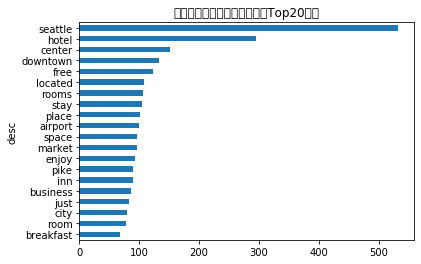

In [42]:
df1 = pd.DataFrame(words_freq[:20], columns = ['desc' , 'count'])
df1.groupby('desc').sum()['count'].sort_values().plot(kind='barh', title='去掉停用词后，酒店描述中的Top20单词')
plt.show()

In [43]:
tf=TfidfVectorizer(analyzer='word',ngram_range=(1,3),min_df=0.01,stop_words='english')

In [44]:
td=tf.fit_transform(df['desc_clean'])

In [97]:
cosine_similarities = linear_kernel(td,td)


In [98]:
indices=pd.Series(df.name)

In [99]:
cosine_similarities

array([[1.        , 0.0391713 , 0.10519839, ..., 0.04506191, 0.01188579,
        0.02732358],
       [0.0391713 , 1.        , 0.06121291, ..., 0.06131857, 0.01508036,
        0.03706011],
       [0.10519839, 0.06121291, 1.        , ..., 0.09179925, 0.04235642,
        0.05607314],
       ...,
       [0.04506191, 0.06131857, 0.09179925, ..., 1.        , 0.0579826 ,
        0.04145794],
       [0.01188579, 0.01508036, 0.04235642, ..., 0.0579826 , 1.        ,
        0.0172546 ],
       [0.02732358, 0.03706011, 0.05607314, ..., 0.04145794, 0.0172546 ,
        1.        ]])

In [61]:
ind=indices[indices=='Hilton Seattle Airport & Conference Center'].index[0]

In [75]:
score=pd.Series(cosine_similarities[ind]).sort_values(ascending=False)

In [83]:
top_10=list(score.iloc[1:11].index)

In [84]:
reco=[]
for i in top_10:
    reco.append(df.name[i])

In [85]:
reco

['Embassy Suites by Hilton Seattle Tacoma International Airport',
 'DoubleTree by Hilton Hotel Seattle Airport',
 'Seattle Airport Marriott',
 'Motel 6 Seattle Sea-Tac Airport South',
 'Knights Inn Tukwila',
 'Four Points by Sheraton Downtown Seattle Center',
 'Radisson Hotel Seattle Airport',
 'Hampton Inn Seattle/Southcenter',
 'Home2 Suites by Hilton Seattle Airport',
 'Red Lion Hotel Seattle Airport Sea-Tac']